$$L(w) = \sum_{i=0}^n{\ln(1+\exp({-w}^Tx_iy_i))} + \gamma \left \| w \right \|_1 $$
$$L'(w) = \sum _{i=1}^{n}\frac{-x_i*y_i * \exp(-w^Tx_iy_i)}{1+\exp(-w^Tx_iy_i)} + \gamma * sign(w_i)$$
                                
Gradient Descend : $$w = w - \eta * \sum _{i=1}^{n}\nabla L_i(w)$$
                                Stohastic Gradient Descend, i - random item
$$w = w - \eta * \nabla L_i(w)$$


In [1]:
import math
import numpy as np
from numpy import random as rnd
import sklearn.preprocessing as preproc
import pylab as pl
from sklearn.utils import shuffle
from numpy import random as rnd
import pickle as pick
from sklearn import linear_model
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [2]:
def calculate_loss(x, y, w, gamma = 0):
    loss = 0.0
    for i in range(len(x)):
        exponent = 0.0
        temp = 0.0
        for j in range(len(x[i])):
            exponent += x[i][j]*w[j]
        exponent = exponent * y[i]
        loss += np.log(1+np.exp(-1*exponent))
    norm =0.0
    for j in range(len(w)):
        norm += abs(w[j])
    loss += gamma*norm
    return loss

In [3]:
def calculate_derivative_in_one_point(x,y,w,i,gamma = 0):
    result = 0.0
    temp = 0.0
    exponent = -1*x[i]*w[i]*y
    xy = -1 * x[i]*y
    result += (1/(1+np.exp(exponent)))*np.exp(exponent)*xy
    return result

In [4]:
def calculate_vector_of_derivatives(x,y,w,gamma=0):
    vector = list()
    for j in range(len(w)):
        temp = 0
        for i in range(len(x)):
            temp += calculate_derivative_in_one_point(x[i],y[i],w,j,gamma)
        temp += gamma*np.sign(w[j])
        vector.append(temp)
    return vector

In [82]:
def GD(X_train, y_train, max_epoch = 1000, alpha = 0.1, gamma = 0, tol = 0.1):
    n = len(X_train)
    dimensions = len(X_train[0])
    w = np.zeros(dimensions)
    l = list()
    old_l = calculate_loss(X_train, y_train, w,gamma)
    new_l = 0
    epoch = 0
    l.append(old_l)
    while (abs(old_l-new_l)>tol and epoch < max_epoch):
        old_l = new_l
        gradient = calculate_vector_of_derivatives(X_train, y_train, w,gamma)
        for i in range(dimensions):
            w[i] = w[i] - alpha*gradient[i]/n
        epoch += 1
        new_l = calculate_loss(X_train, y_train, w,gamma)
        l.append(new_l)
    return w, l

In [110]:
def SGD(X_train, y_train, max_epoch = 1000, alpha = 0.1, gamma = 0):
    n = len(X_train)
    dimensions = len(X_train[0])
    w = np.zeros(dimensions)
    l = list()
    old_l = calculate_loss(X_train, y_train, w)
    new_l = 0
    epoch = 0
    l.append(old_l)
    X_train, y_train = shuffle(X_train, y_train)
    while (epoch < n/2 and epoch < max_epoch):
        alpha = alpha * 0.98
        old_l = new_l
        i = rnd.randint(0,n)
        gradient = np.zeros(dimensions)
        for j in range(dimensions):
            gradient[j] += calculate_derivative_in_one_point(X_train[i],y_train[i],w,j)            
            w[j] = w[j] - (alpha)*gradient[j]
        epoch += 1
        new_l = calculate_loss(X_train, y_train, w)
        l.append(new_l)
    return w, l

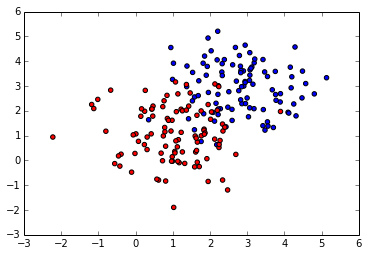

In [228]:
arr1 = rnd.multivariate_normal([3,3],np.eye(2),100)
arr2 = rnd.multivariate_normal([1,1],np.eye(2),100)
X = np.concatenate((arr1,arr2))
X = np.insert(X,1,1,axis=1)
pl.scatter(arr1[:,0],arr1[:,1])
pl.scatter(arr2[:,0],arr2[:,1], c='r')

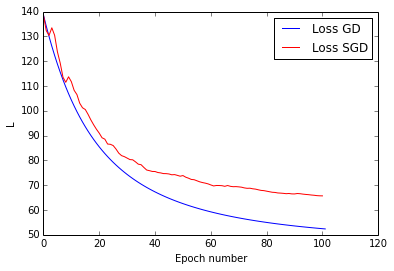

In [229]:
labels = np.concatenate((np.zeros(100), np.ones(100)))
labels[labels==0] = -1 
scaler_categorical = preproc.StandardScaler().fit(X)
X = scaler_categorical.transform(X)

w_gd, l_gd = GD(X,labels)
w_sgd, l_sgd = SGD(X,labels)
pl.plot(l_gd, label = 'Loss GD')
pl.plot(l_sgd, label = 'Loss SGD ', c='r')
pl.xlabel('Epoch number')
pl.ylabel('L')
pl.legend(loc='best')

In [230]:
pkl_file = open('first_dataset.pkl', 'rb')
data = pick.load(pkl_file)

x_train = data['train_data']
y_train = data['train_labels']

x_test = data['test_data']
y_test = data['test_labels']

logistic = linear_model.LogisticRegression()
logistic.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [231]:
scaler_categorical = preproc.StandardScaler().fit(x_train)
x_train = scaler_categorical.transform(x_train)
x_train = np.insert(x_train,1,1,axis=1)

scaler_categorical = preproc.StandardScaler().fit(x_test)
x_test = scaler_categorical.transform(x_test)
x_test = np.insert(x_test,1,1,axis=1)

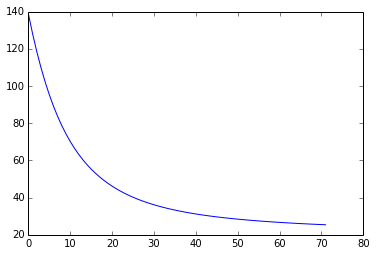

In [234]:
w, L1 = GD(x_train, y_train, gamma = 0)
pl.plot(L1)

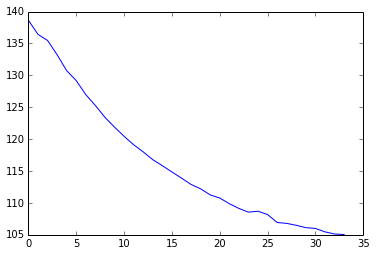

In [235]:
w_reg, L2 = GD(x_train, y_train, gamma = 9)
pl.plot(L2)

In [148]:
def predict_class(x,w,border = 0):
    res = 0
    for i in range(len(x)):
        res += x[i]*w[i]
        
    if res > border:
        return 1
    else:
        return -1
    
def calculate_indicators(data, labels, weights):
    true_positive = 0
    false_positive = 0
    true_negative = 0
    false_negative = 0
    for i in range(len(data)):
        predicted_class = predict_class(data[i], weights)
        actual_class = labels[i]
        if predicted_class == 1:
            if actual_class == predicted_class:
                true_positive += 1
            else:
                false_positive += 1
        else:
            if predicted_class == actual_class:
                true_negative += 1
            else:
                false_negative += 1
                
    correctness = float(true_positive + true_negative) / len(data)
    precision = float(true_positive) / (true_positive + false_positive)
    recall = float(true_positive) / (true_positive + false_negative)
    return correctness, precision, recall

In [236]:
accuracy,precision,recall = calculate_indicators(x_test, y_test, w)
print 'Without regularization'
print 'Accuracy {0}'.format(accuracy)
print 'Precision {0}'.format(precision)
print 'Recall {0}'.format(recall)

Without regularization
Accuracy 0.705
Precision 0.739583333333
Recall 0.67619047619


In [237]:
accuracy,precision,recall = calculate_indicators(x_test, y_test, w_reg)
print 'With regularization'
print 'Accuracy {0}'.format(accuracy)
print 'Precision {0}'.format(precision)
print 'Recall {0}'.format(recall)

With regularization
Accuracy 0.86
Precision 0.859813084112
Recall 0.87619047619


In [238]:
accuracy,precision,recall =  calculate_indicators(x_train, y_train, w)
print 'Without regularization'
print 'Accuracy {0}'.format(accuracy)
print 'Precision {0}'.format(precision)
print 'Recall {0}'.format(recall)

print '--------------------------------------------'
accuracy, precision, recall =  calculate_indicators(x_train, y_train, w_reg)
print 'With regularization'
print 'Accuracy {0}'.format(accuracy)
print 'Precision {0}'.format(precision)
print 'Recall {0}'.format(recall)

Without regularization
Accuracy 0.95
Precision 0.947916666667
Recall 0.947916666667
--------------------------------------------
With regularization
Accuracy 0.96
Precision 0.958333333333
Recall 0.958333333333


As expected, indicators for case with regularization are higher than those for case without it. Regularization help us to deal with overfitting and in our situation we have not enough train objects, but too much features. So without regulatization we have overfitting problem.

In [152]:
# two most features has the same index as two biggest items of w - vector
def find_two_most_important_features(weights):
    first_max_value = 0.0
    first_max_index = 0
    
    second_max_value = 0.0
    second_max_index = 0
    
    for i in range(len(weights)):
        if abs(weights[i])>first_max_value:
            first_max_value = abs(weights[i])
            first_max_index = i
    
    for i in range(len(weights)):
        if (abs(weights[i]) > second_max_value) and (first_max_index != i):
            second_max_value = abs(weights[i])
            second_max_index = i
            
    return first_max_index, second_max_index

In [153]:
first_max, second_max = find_two_most_important_features(w_reg)
print 'Two most important features are:'
print first_max,second_max

Two most important features are:
35 91


In [192]:
x_train = data['train_data']
y_train = data['train_labels']

x_test = data['test_data']
y_test = data['test_labels']

test_data = list()
for obj in x_test:
    f1 = (obj[first_max])
    f2 = (obj[second_max])
    test_data.append(np.array([f1, f2]))


train_data = list()
for obj in x_train:
    f1 = (obj[first_max])
    f2 = (obj[second_max]) 
    train_data.append( np.array([f1,f2]))

scaler_categorical = preproc.StandardScaler().fit(train_data)
train_data  = scaler_categorical.transform(train_data)
test_data  = scaler_categorical.transform(test_data)
train_data =  np.insert(train_data,1,1,axis=1)
test_data = np.insert(test_data,1,1,axis=1)



In [195]:
# trying to draw
print train_data[0]
logistic = linear_model.LogisticRegression()
logistic.fit(train_data, y_train)
h = .02
x_min, x_max = test_data[:,0].min() - .5, test_data[:,0].max() + .5
y_min, y_max = test_data[:,1].min() - .5, test_data[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logistic.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

pylab.figure(1, figsize=(4, 3))
pylab.set_cmap(pylab.cm.Paired)
pylab.pcolormesh(xx, yy, Z)
#Color dots
pylab.scatter(arr[:len(arr1), 0], arr[:len(arr1),1], c='b') 
pylab.scatter(arr[len(arr1):, 0], arr[len(arr1):,1], c='r')
pylab.xlabel('x')
pylab.ylabel('y')

[-0.88955062  1.         -1.41793344]


ValueError: X has 2 features per sample; expecting 3

In [193]:
w3,L3 = GD(train_data, y_train)
correctness, precision, recall = calculate_indicators(test_data,y_test, w3)
print 'Two features only'
print 'With regularization'
print 'Correctness {0}'.format(correctness)
print 'Precision {0}'.format(precision)
print 'Recall {0}'.format(recall)


Two features only
With regularization
Correctness 0.495
Precision 0.527027027027
Recall 0.371428571429


In [205]:
pkl_file = open('diabetes.pkl', 'rb')
data = pick.load(pkl_file)
x_deab = data['data']
y_deab = data['labels']
logistic = linear_model.LogisticRegression()
logistic.fit(x_deab, y_deab)
scaler_categorical = preproc.StandardScaler().fit(x_deab)
x_deab  = scaler_categorical.transform(x_deab)
x_deab =  np.insert(x_deab,1,1,axis=1)
w, L = SGD(x_deab, y_deab)

In [206]:
pred = [predict_class(obj, w) for obj in x_deab]
conf_mat = confusion_matrix(y_deab, pred)
print conf_mat
print 'Number of false-positive : {0}'.format(conf_mat[1][0])
print 'Number of false-negative : {0}'.format(conf_mat[0][1])
false_positive_rate = float(conf_mat[1][0])/(conf_mat[1][0] + conf_mat[0][1])
false_negative_rate = float(conf_mat[0][1])/(conf_mat[0][1] + conf_mat[1][0])

print 'False positive rate: {0}'.format(false_positive_rate)
print 'False negative rate: {0}'.format(false_negative_rate)


[[381 119]
 [ 91 177]]
Number of false-positive : 91
Number of false-negative : 119
False positive rate: 0.433333333333
False negative rate: 0.566666666667


Rates are so different, because False positive mistakes a much more dangerous, and classifier is designed to not to do mistakes of this kind

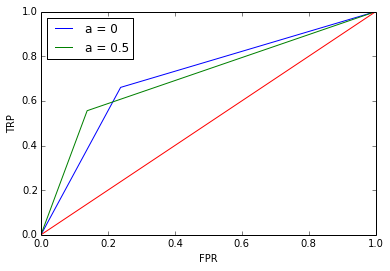

In [221]:
a = 0.5
pred = [predict_class(obj, w) for obj in x_deab]
pred_a = [predict_class(obj, w, a) for obj in x_deab]
conf_mat = confusion_matrix(y_deab, pred)


fpr, tpr, thrs = roc_curve(y_deab, pred, pos_label=1)
fpr_a, tpr_a, thrs_a = roc_curve(y_deab, pred_a, pos_label=1)
pl.plot(fpr, tpr, label = 'a = 0')
pl.plot(fpr_a,tpr_a, label = 'a = 0.5')
pl.legend(loc = 'best')
pl.xlabel('FPR')
pl.ylabel('TRP')
pl.plot([0, 1], [0, 1], '-')




In [227]:
a = 0
num = 0
for rate in tpr:
    if rate > 0.8:
        break
    num += 1

    
a = thrs[num]
print 'Best a is {0}: '.format(a)

pred = [predict_class(obj, w, a) for obj in x_deab]
conf_mat = confusion_matrix(y_deab, pred)
accuracy = (float(conf_mat[1][1])+conf_mat[0][0])/len(pred)
false_positive_rate = float(conf_mat[1][0])/(conf_mat[1][0] + conf_mat[0][1])
false_negative_rate = float(conf_mat[0][1])/(conf_mat[0][1] + conf_mat[1][0])

print 'False positive rate: {0}'.format(false_positive_rate)
print 'False negative rate: {0}'.format(false_negative_rate)
print 'Accuracy: {0}'.format(accuracy)


Best a is -1: 
False positive rate: 0.08984375
False negative rate: 0.91015625
Accuracy: 0.666666666667


Very small false positive rate is extremely good.